In [1]:
#Laptops Under 50000rs 
#importing required libleries 
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests 
from csv import writer
import matplotlib.pyplot as plt

In [2]:
#preparing data to scrap
main_url= 'https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_3_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptop%7CLaptops&requestId=f1d11b46-fb0e-4a92-80aa-6e0209d82788&as-backfill=on&p%5B%5D=facets.price_range.from%3DMin&p%5B%5D=facets.price_range.to%3D50000&page='
source=requests.get(main_url)
soup=BeautifulSoup(source.text,'html.parser')
main_soup=str(soup)
for i in range(2,21):
    secondurl=main_url+str(i)
    sourcesec=requests.get(secondurl)
    soupsec=BeautifulSoup(sourcesec.text,'html.parser')
    main_soup+=str(soupsec)
main_soup=BeautifulSoup(main_soup,'html.parser')    

In [3]:
#collecting requred information 
laptop_list=main_soup.find_all('div',class_="_1AtVbE")

In [4]:
#Collecting laptop details From Website
with open ('laptop_info.csv','w',encoding='utf8',newline='') as f:
    Thewriter = writer(f)
    header=['Laptop Name','Processor','Ram','Orignal Price','Discounted Price','Total Reviews','Total Ratings','Avarage Rating','Image link']
    Thewriter.writerow(header)
    for laptop in laptop_list:
        #creating csv file to save data
        #finding laptop name
        try:
            Name=laptop.find('div',class_="_4rR01T").text.split('-')[0].strip()
        except:
            Name='None'
        #finding laptop actual price
        try:
            actual_price=int(laptop.find('div',class_="_3I9_wc").text.replace(',','').replace('₹',''))
        except:
            actual_price=0
        #finding laptop offer price
        try:
            price=int(laptop.find('div',class_="_30jeq3").text.replace(',','').replace('₹',''))
        except:
            price=0
        #finding laptop avg rating
        try:
            rating=float(laptop.find('div',class_="_3LWZlK").text)
        except:
            rating=0
        #finding laptop total rating
        try:
            total_ratings=laptop.find('span',class_="_2_R_DZ").text.split('&')[0].split(' ')[0].replace(',','').strip()
        except:
            total_ratings=0
        #finding laptop reviewws
        try:
            total_rev=laptop.find('span',class_="_2_R_DZ").text.split('&')[1].split(' ')[0].replace(',','').strip()
        except:
            total_rev=0
        #finding laptop procssor
        try:
            processor=laptop.find('li',class_="rgWa7D").text.replace('Processor:','').strip()
        except:
            processor='None'

        #finding laptop ram
        try:
            ram=int(laptop.find_all('li',class_="rgWa7D")[1].text.split ('GB')[0].replace('RAM & Storage:','').strip())
        except:
            ram='None'

        try:
            image=(laptop.find('img')).get('src')
        except:
            image='None'
        info=[Name,processor,ram,actual_price,price,total_rev,total_ratings,rating,image]
        Thewriter.writerow(info)

In [5]:
df=pd.read_csv('laptop_info.csv')
df

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
0,None,None,None,0,0,0,0,0.0,//static-assets-web.flixcart.com/fk-p-linchpin...
1,None,None,None,0,0,0,0,0.0,//static-assets-web.flixcart.com/fk-p-linchpin...
2,None,None,None,0,0,0,0,0.0,None
3,ASUS Vivobook 15 Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,43990,27990,30,349,4.2,https://rukminim1.flixcart.com/image/312/312/x...
4,ASUS TUF Gaming F15 Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,70990,47990,100,1209,4.4,https://rukminim1.flixcart.com/image/312/312/l...
...,...,...,...,...,...,...,...,...,...
575,ASUS Vivobook 15 Touch Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,60990,42990,14,85,4.4,https://rukminim1.flixcart.com/image/312/312/l...
576,HP APU Pro A4,AMD APU Pro A4 Processor,4,27668,18500,8,82,3.2,https://rukminim1.flixcart.com/image/312/312/l...
577,HP 15s Ryzen 3 Dual Core 3250U,AMD Ryzen 3 Dual Core Processor,8,43990,38500,924,7456,4.1,https://rukminim1.flixcart.com/image/312/312/k...
578,None,None,None,0,0,0,0,0.0,None


In [6]:
#removiung none values from df
df[df['Laptop Name']=='None']=None
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
0,ASUS Vivobook 15 Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,43990.0,27990.0,30.0,349.0,4.2,https://rukminim1.flixcart.com/image/312/312/x...
1,ASUS TUF Gaming F15 Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,70990.0,47990.0,100.0,1209.0,4.4,https://rukminim1.flixcart.com/image/312/312/l...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,45990.0,33990.0,370.0,3600.0,4.3,https://rukminim1.flixcart.com/image/312/312/k...
3,ASUS VivoBook 15 (2022) Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,57990.0,43990.0,211.0,2408.0,4.3,https://rukminim1.flixcart.com/image/312/312/k...
4,HP Athlon Dual Core 3050U,AMD Athlon Dual Core Processor,8,39288.0,29990.0,0.0,11.0,4.8,https://rukminim1.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...
475,DELL Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,56700.0,47500.0,0.0,8.0,3.3,https://rukminim1.flixcart.com/image/312/312/l...
476,ASUS Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,50990.0,33990.0,118.0,863.0,4.3,https://rukminim1.flixcart.com/image/312/312/k...
477,ASUS Vivobook 15 Touch Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,60990.0,42990.0,14.0,85.0,4.4,https://rukminim1.flixcart.com/image/312/312/l...
478,HP APU Pro A4,AMD APU Pro A4 Processor,4,27668.0,18500.0,8.0,82.0,3.2,https://rukminim1.flixcart.com/image/312/312/l...


In [7]:
#top laptop by rating
df[df['Avarage Rating']==max(df['Avarage Rating'])]

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
279,Lenovo Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,56800.0,38980.0,0.0,4.0,5.0,https://rukminim1.flixcart.com/image/312/312/k...


In [8]:
#Top 5 Laptops
df.sort_values(by='Avarage Rating',ascending =False).head().reset_index(drop=True)

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
0,Lenovo Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,56800.0,38980.0,0.0,4.0,5.0,https://rukminim1.flixcart.com/image/312/312/k...
1,Lenovo Ideapad Slim 3i (2021) Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,59998.0,38899.0,0.0,6.0,4.8,https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,59990.0,41990.0,1.0,20.0,4.8,https://rukminim1.flixcart.com/image/312/312/l...
3,HP Athlon Dual Core 3050U,AMD Athlon Dual Core Processor,8,39288.0,29990.0,0.0,11.0,4.8,https://rukminim1.flixcart.com/image/312/312/x...
4,ASUS Vivobook 15 Core i5 11th Gen,Intel Core i5 Processor (11th Gen),8,69990.0,45990.0,2.0,6.0,4.8,https://rukminim1.flixcart.com/image/312/312/x...


In [9]:
#Top 15 Laptops
df.sort_values(by='Avarage Rating',ascending =False).head(15).reset_index(drop=True)

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
0,Lenovo Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,56800.0,38980.0,0.0,4.0,5.0,https://rukminim1.flixcart.com/image/312/312/k...
1,Lenovo Ideapad Slim 3i (2021) Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,59998.0,38899.0,0.0,6.0,4.8,https://rukminim1.flixcart.com/image/312/312/k...
2,ASUS Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,59990.0,41990.0,1.0,20.0,4.8,https://rukminim1.flixcart.com/image/312/312/l...
3,HP Athlon Dual Core 3050U,AMD Athlon Dual Core Processor,8,39288.0,29990.0,0.0,11.0,4.8,https://rukminim1.flixcart.com/image/312/312/x...
4,ASUS Vivobook 15 Core i5 11th Gen,Intel Core i5 Processor (11th Gen),8,69990.0,45990.0,2.0,6.0,4.8,https://rukminim1.flixcart.com/image/312/312/x...
5,DELL Ryzen 3 Quad Core 5425U,R3-5425U (2.70 GHz up to 4.1 GHz),8,50837.0,37390.0,0.0,7.0,4.7,https://rukminim1.flixcart.com/image/312/312/l...
6,ASUS VivoBook Flip 14 Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,63990.0,45990.0,3.0,44.0,4.6,https://rukminim1.flixcart.com/image/312/312/k...
7,ASUS VivoBook Flip 14 Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,63990.0,45990.0,3.0,44.0,4.6,https://rukminim1.flixcart.com/image/312/312/k...
8,ASUS VivoBook Flip 14 Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,63990.0,45990.0,3.0,44.0,4.6,https://rukminim1.flixcart.com/image/312/312/k...
9,ASUS VivoBook Flip 14 Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,63990.0,45990.0,3.0,44.0,4.6,https://rukminim1.flixcart.com/image/312/312/k...


In [10]:
#last 5 Laptops
df.sort_values(by='Avarage Rating',ascending =True).head().reset_index(drop=True)

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
0,Lenovo IdeaPad 3 Celeron Dual Core,Intel Celeron Dual Core Processor,4,36999.0,30699.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...
1,ASUS Vivobook 11 Celeron Dual Core,Intel Celeron Dual Core Processor,4,28990.0,23890.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/l...
2,CHUWI Celeron Quad Core,Intel Celeron Quad Core Processor,8,39990.0,27990.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/x...
3,Lenovo Lenovo V15 Celeron Dual Core,Intel Celeron Dual Core Processor,4,36000.0,26505.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...
4,Lenovo Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,56590.0,38899.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...


In [11]:
#last 15 Laptops
df.sort_values(by='Avarage Rating',ascending =True).head(15).reset_index(drop=True)

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
0,Lenovo IdeaPad 3 Celeron Dual Core,Intel Celeron Dual Core Processor,4,36999.0,30699.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...
1,ASUS Vivobook 11 Celeron Dual Core,Intel Celeron Dual Core Processor,4,28990.0,23890.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/l...
2,CHUWI Celeron Quad Core,Intel Celeron Quad Core Processor,8,39990.0,27990.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/x...
3,Lenovo Lenovo V15 Celeron Dual Core,Intel Celeron Dual Core Processor,4,36000.0,26505.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...
4,Lenovo Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,56590.0,38899.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...
5,DELL Core i3 11th Gen,Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to ...,8,52938.0,38390.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/l...
6,Lenovo Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,54999.0,38899.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...
7,Lenovo Ideapad Slim 1 Celeron Dual Core,Intel Celeron Dual Core Processor,4,41890.0,26999.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/k...
8,ASUS Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,49000.0,34175.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/x...
9,ASUS Vivobook 11 Celeron Dual Core,Intel Celeron Dual Core Processor,4,28990.0,23990.0,0.0,0.0,0.0,https://rukminim1.flixcart.com/image/312/312/l...


In [12]:
#costliest laptop
df[df['Orignal Price']==max(df['Orignal Price'])]

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
158,Nokia PureBook X14 Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,90000.0,49490.0,285.0,1352.0,4.4,https://rukminim1.flixcart.com/image/312/312/k...


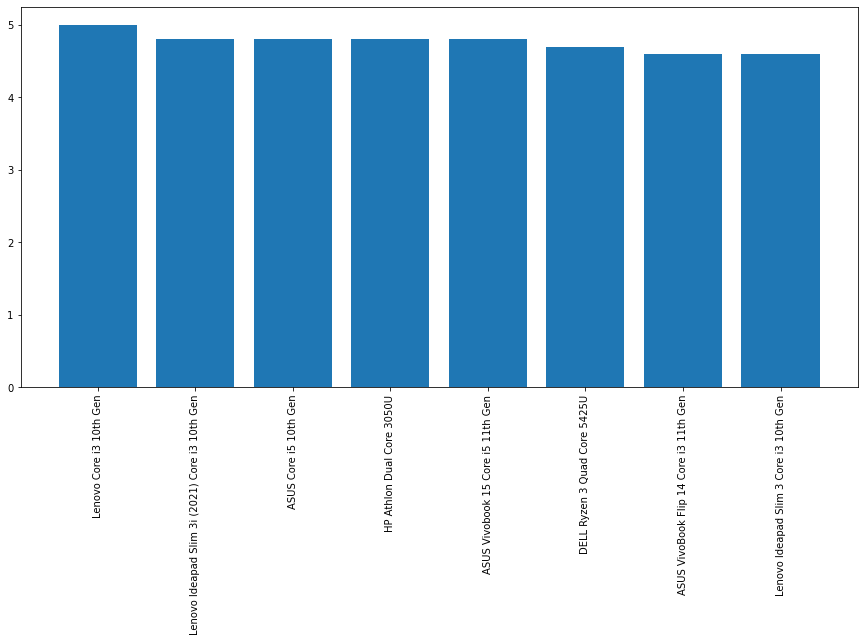

In [13]:
#top 15 graph
plt.figure(figsize=(15,7))
df_top=df.sort_values(by='Avarage Rating',ascending =False).head(15).reset_index(drop=True)
plt.bar(x=df_top['Laptop Name'],height=df_top['Avarage Rating'])
plt.xticks(rotation=90)
plt.show()

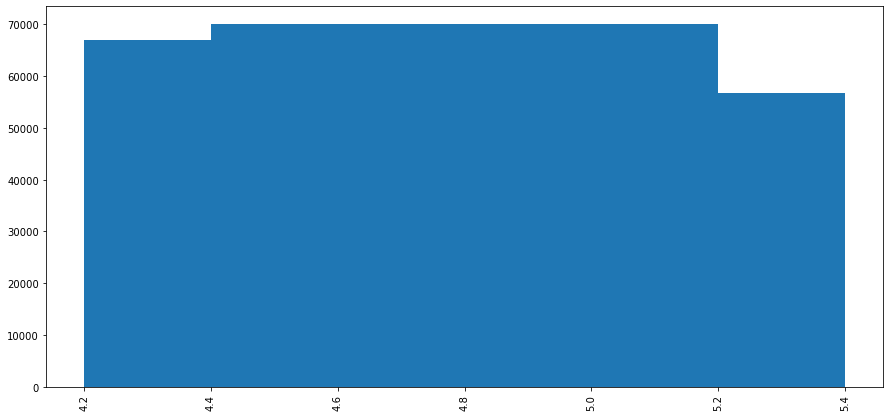

In [14]:
#top 15 graph
plt.figure(figsize=(15,7))
df_top=df.sort_values(by='Avarage Rating',ascending =False).head(15).reset_index(drop=True)
plt.bar(x=df_top['Avarage Rating'],height=df_top['Orignal Price'])
plt.xticks(rotation=90)
plt.show()

In [15]:
df.to_csv('laptop_info.csv')

In [16]:
df.to_json()

'{"Laptop Name":{"0":"ASUS Vivobook 15 Core i3 10th Gen","1":"ASUS TUF Gaming F15 Core i5 10th Gen","2":"ASUS VivoBook 15 (2022) Core i3 10th Gen","3":"ASUS VivoBook 15 (2022) Core i5 10th Gen","4":"HP Athlon Dual Core 3050U","5":"HP Core i3 11th Gen","6":"HP Ryzen 5 Hexa Core 5500U","7":"ASUS VivoBook 14 (2022) Ryzen 5 Quad Core AMD R5","8":"Lenovo IdeaPad 3 Core i3 11th Gen","9":"ASUS Vivobook 15 Core i3 10th Gen","10":"ASUS Vivobook Ultra 14 (2022) Core i3 11th Gen","11":"ASUS VivoBook Ultra K15 OLED Core i3 11th Gen","12":"DELL Inspiron Athlon Dual Core 3050U","13":"Lenovo IdeaPad 3 Celeron Dual Core","14":"Lenovo IdeaPad Gaming Core i5 11th Gen","15":"acer Aspire 7 Ryzen 5 Hexa Core AMD R5","16":"ASUS VivoBook 15 (2022) Core i3 10th Gen","17":"ASUS Core i3 11th Gen","18":"HP Core i3 11th Gen","19":"MSI Modern 14 Ryzen 5 Hexa Core 5500U","20":"ASUS Vivobook 15 Touch Core i3 11th Gen","21":"ASUS VivoBook Flip 14 Core i3 11th Gen","22":"acer Extensa Core i3 11th Gen","23":"ASUS VivoB

In [17]:
df.to_json('laptop_info.json', orient = "records", date_format = "epoch", double_precision = 10, force_ascii = True, date_unit = "ms", default_handler = None)

In [18]:
pd.read_json('laptop_info.json')

,Laptop Name,Processor,Ram,Orignal Price,Discounted Price,Total Reviews,Total Ratings,Avarage Rating,Image link
0,ASUS Vivobook 15 Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,43990,27990,30,349,4.2,https://rukminim1.flixcart.com/image/312/312/x...
1,ASUS TUF Gaming F15 Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,70990,47990,100,1209,4.4,https://rukminim1.flixcart.com/image/312/312/l...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen,Intel Core i3 Processor (10th Gen),8,45990,33990,370,3600,4.3,https://rukminim1.flixcart.com/image/312/312/k...
3,ASUS VivoBook 15 (2022) Core i5 10th Gen,Intel Core i5 Processor (10th Gen),8,57990,43990,211,2408,4.3,https://rukminim1.flixcart.com/image/312/312/k...
4,HP Athlon Dual Core 3050U,AMD Athlon Dual Core Processor,8,39288,29990,0,11,4.8,https://rukminim1.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...
475,DELL Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,56700,47500,0,8,3.3,https://rukminim1.flixcart.com/image/312/312/l...
476,ASUS Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,50990,33990,118,863,4.3,https://rukminim1.flixcart.com/image/312/312/k...
477,ASUS Vivobook 15 Touch Core i3 11th Gen,Intel Core i3 Processor (11th Gen),8,60990,42990,14,85,4.4,https://rukminim1.flixcart.com/image/312/312/l...
478,HP APU Pro A4,AMD APU Pro A4 Processor,4,27668,18500,8,82,3.2,https://rukminim1.flixcart.com/image/312/312/l...
